In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
house_data = pd.read_csv('house_price.csv')
house_data = pd.DataFrame(house_data)


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price(Lakhs)  2620 non-null   float64
 1   area(sqft)    2620 non-null   int64  
 2   status        2620 non-null   object 
 3   bhk           2620 non-null   int64  
 4   bathroom      1403 non-null   float64
 5   age           1729 non-null   float64
 6   location      2620 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 143.4+ KB


array([[<Axes: title={'center': 'price(Lakhs)'}>,
        <Axes: title={'center': 'area(sqft)'}>],
       [<Axes: title={'center': 'bhk'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

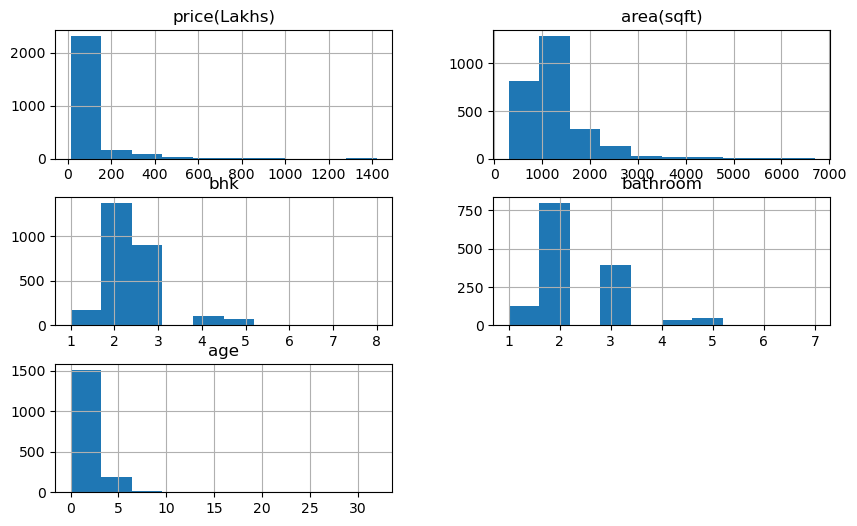

In [5]:
house_data.hist(figsize=(10,6))

In [6]:
skewed = house_data['bathroom'].skew()
skewed2 = house_data['age'].skew()
print(skewed,skewed2)

1.2956634052934854 3.475254224819594


In [7]:
house_data['bathroom'].fillna(house_data['bathroom'].median(),inplace=True)
house_data['age'].fillna(house_data['age'].median(),inplace=True)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_17160\2866197264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data['bathroom'].fillna(house_data['bathroom'].median(),inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_17160\2866197264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [8]:
skewed = house_data['bathroom'].skew()
skewed2 = house_data['age'].skew()
print(skewed,skewed2)

2.2829078431574086 4.142410106176115


In [9]:
house_data['bathroom'] = np.log(house_data['bathroom'] + 1)
house_data['age'] = np.log(house_data['age'] + 1)
house_data['area(sqft)'] = np.log(house_data['area(sqft)'] + 1)
house_data['bhk'] = np.log(house_data['bhk'] + 1)
house_data['price(Lakhs)'] = np.log(house_data['price(Lakhs)'] + 1)


array([[<Axes: title={'center': 'price(Lakhs)'}>,
        <Axes: title={'center': 'area(sqft)'}>],
       [<Axes: title={'center': 'bhk'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

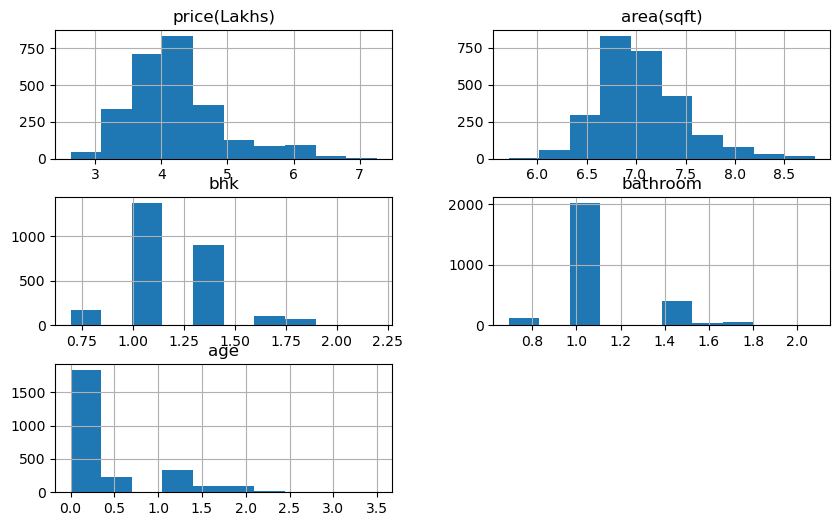

In [10]:
house_data.hist(figsize=(10,6))

In [11]:
print(house_data['age'].skew(),house_data['bhk'].skew(),house_data['area(sqft)'].skew(),house_data['price(Lakhs)'].skew(),house_data['bathroom'].skew(),)

1.3683037512742573 0.06461758124698189 0.6646823712402501 1.0207965544187025 0.9047218173225144


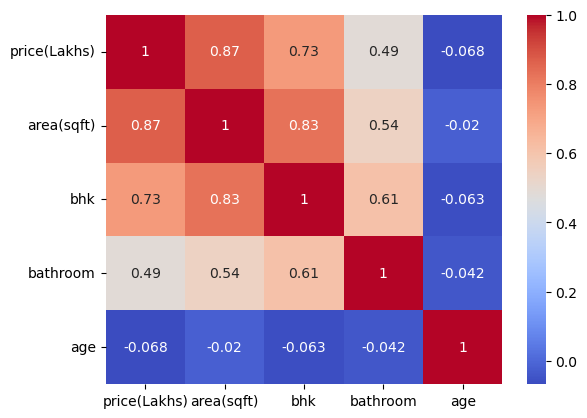

In [12]:

sn.heatmap(house_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [13]:
house_data.drop(columns=['status'],inplace=True)


In [14]:
house_data

,price(Lakhs),area(sqft),bhk,bathroom,age,location
0,3.650398,6.771936,1.098612,1.098612,0.693147,Sembakkam
1,4.549023,7.205635,1.386294,1.098612,0.000000,Selaiyur
2,5.023881,7.707962,1.386294,1.098612,0.000000,Mogappair
3,3.912023,6.936343,1.098612,1.098612,1.386294,Ambattur
4,3.767691,6.378426,1.098612,0.693147,0.000000,Pallavaram
...,...,...,...,...,...,...
2615,3.349904,6.621406,1.098612,1.098612,1.386294,Veppampattu
2616,3.349904,6.621406,1.098612,1.098612,1.386294,Veppampattu
2617,3.433987,6.685861,1.098612,1.098612,1.386294,Veppampattu
2618,3.481240,6.746412,1.098612,1.098612,1.386294,Veppampattu


<Axes: xlabel='area(sqft)', ylabel='price(Lakhs)'>

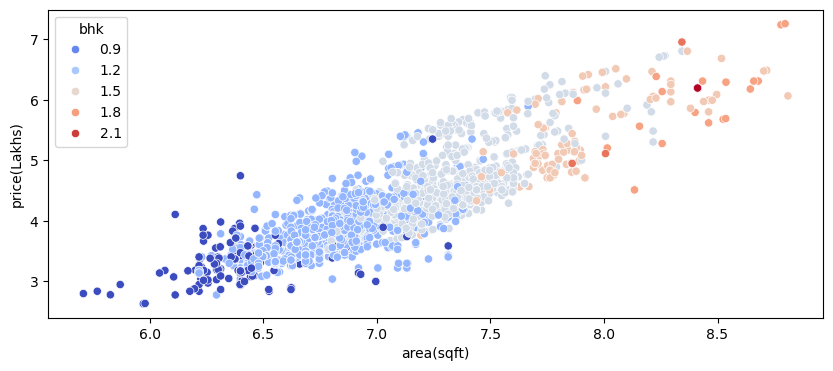

In [15]:
plt.figure(figsize=(10,4))
sn.scatterplot(x='area(sqft)',y='price(Lakhs)',data=house_data,hue='bhk',palette='coolwarm')

In [16]:
house_data_numeric = house_data[['area(sqft)','bhk','age','price(Lakhs)','bathroom']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
house_data_numeric_scaled = scaler.fit_transform(house_data_numeric)

house_data_numeric_scaled = pd.DataFrame(house_data_numeric_scaled, columns=house_data_numeric.columns)

house_data_numeric_scaled

,area(sqft),bhk,age,price(Lakhs),bathroom
0,-0.665638,-0.490540,0.491660,-0.804689,-0.251985
1,0.349763,0.771759,-0.602227,0.454197,-0.251985
2,1.525837,0.771759,-0.602227,1.119427,-0.251985
3,-0.280719,-0.490540,1.585546,-0.438178,-0.251985
4,-1.586944,-0.490540,-0.602227,-0.640374,-2.517787
...,...,...,...,...,...
2615,-1.018067,-0.490540,1.585546,-1.225653,-0.251985
2616,-1.018067,-0.490540,1.585546,-1.225653,-0.251985
2617,-0.867161,-0.490540,1.585546,-1.107861,-0.251985
2618,-0.725395,-0.490540,1.585546,-1.041664,-0.251985


In [17]:
house_data_combined = house_data_numeric_scaled.join(
    pd.get_dummies(house_data, columns=['location']),
    rsuffix='_encoded')

In [20]:
house_data_combined.drop(['price(Lakhs)_encoded','area(sqft)_encoded','bhk_encoded','bathroom_encoded','age_encoded'],axis=1)

,area(sqft),bhk,age,price(Lakhs),bathroom,location_Adambakam,location_Adyar,location_Agaramthen,location_Alandur,location_Alwarpet,...,location_Vengaivasal,location_Vengambakkam,location_Veppampatttu,location_Veppampattu,location_Villivakkam,location_Virugambakkam,location_Washermanpet,location_West Mambalam,location_West Tambaram,location_tambaram west
0,-0.665638,-0.490540,0.491660,-0.804689,-0.251985,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.349763,0.771759,-0.602227,0.454197,-0.251985,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.525837,0.771759,-0.602227,1.119427,-0.251985,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.280719,-0.490540,1.585546,-0.438178,-0.251985,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.586944,-0.490540,-0.602227,-0.640374,-2.517787,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,-1.018067,-0.490540,1.585546,-1.225653,-0.251985,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2616,-1.018067,-0.490540,1.585546,-1.225653,-0.251985,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2617,-0.867161,-0.490540,1.585546,-1.107861,-0.251985,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2618,-0.725395,-0.490540,1.585546,-1.041664,-0.251985,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split

X = house_data_combined.drop('price(Lakhs)',axis=1)
Y = house_data_combined['price(Lakhs)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,Y_train)

LinearRegression()

In [23]:
reg.score(X_test,Y_test)

0.9999999862594623

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.3212160342098576e-08
R² Score: 0.9999999862594623


In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test,Y_test)

0.999943579796175

In [27]:
y_pred_rf = forest.predict(X_test)

mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest Mean Squared Error: 5.425062651297877e-05
Random Forest R² Score: 0.999943579796175


In [29]:
house_data_combined.to_csv('final_data_set.csv', index=False)